In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import math
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend, models, layers, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import (
    BatchNormalization,
    Input,
    Concatenate,
    Dense,
    Dropout,
    Flatten,
    Conv2D,
    MaxPooling2D,
)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

In [ ]:
train_directory = pathlib.Path("/content/drive/MyDrive/DataXuLyAnh/train")
validation_directory = pathlib.Path("/content/drive/MyDrive/DataXuLyAnh/validation")

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

validation_set = tf.keras.utils.image_dataset_from_directory(
    validation_directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1707 files belonging to 20 classes.
Found 194 files belonging to 20 classes.


In [ ]:
print(len(training_set))

54


In [ ]:
class_names = training_set.class_names
print(class_names)

['apple', 'banana', 'bell pepper', 'carrot', 'corn', 'cucumber', 'eggplant', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'mango', 'onion', 'orange', 'pear', 'pineapple', 'pomegranate', 'potato', 'tomato', 'watermelon']


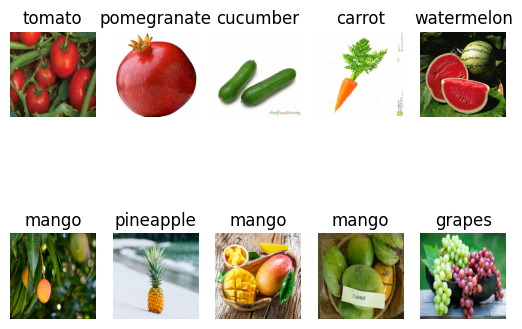

In [ ]:
for images, labels in training_set.take(1):
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"{class_names[tf.argmax(labels[i]).numpy()]}")
        plt.axis("off")

plt.show()

In [ ]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(224, 224, 3)),
        tf.keras.layers.Conv2D(
            32, (3, 3), strides=1, padding="same", activation="relu"
        ),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.Conv2D(
            64, (3, 3), strides=1, padding="same", activation="relu"
        ),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(20, activation="softmax"),
    ]
)

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# create Early Stopping
callback = EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)

In [ ]:
BATCH_SIZE = 32
total_samples = len(training_set) * BATCH_SIZE
STEPS_PER_EPOCH = math.ceil(total_samples / BATCH_SIZE)

history = model.fit(
    training_set,
    batch_size=BATCH_SIZE,
    epochs=20,
    steps_per_epoch=STEPS_PER_EPOCH,
    verbose=1,
    validation_data=validation_set,
    callbacks=[callback],
)

Epoch 1/20
54/54 [==============================] - 48s 796ms/step - loss: 0.4313 - accuracy: 0.9074 - val_loss: 1.9199 - val_accuracy: 0.8918
Epoch 2/20
54/54 [==============================] - 50s 823ms/step - loss: 0.3919 - accuracy: 0.9402 - val_loss: 2.0522 - val_accuracy: 0.9021
Epoch 3/20
54/54 [==============================] - 48s 787ms/step - loss: 0.2707 - accuracy: 0.9473 - val_loss: 2.1338 - val_accuracy: 0.9072
Epoch 4/20
54/54 [==============================] - 47s 780ms/step - loss: 0.5002 - accuracy: 0.9028 - val_loss: 1.8290 - val_accuracy: 0.8763
Epoch 5/20
54/54 [==============================] - 48s 794ms/step - loss: 0.2657 - accuracy: 0.9420 - val_loss: 1.2258 - val_accuracy: 0.9227
Epoch 6/20
54/54 [==============================] - 48s 792ms/step - loss: 0.1387 - accuracy: 0.9654 - val_loss: 1.3372 - val_accuracy: 0.9485
Epoch 7/20
54/54 [==============================] - 47s 763ms/step - loss: 0.1056 - accuracy: 0.9701 - val_loss: 1.6157 - val_accuracy: 0.9124

In [ ]:
model.save("/content/drive/MyDrive/DataXuLyAnh/model_final.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


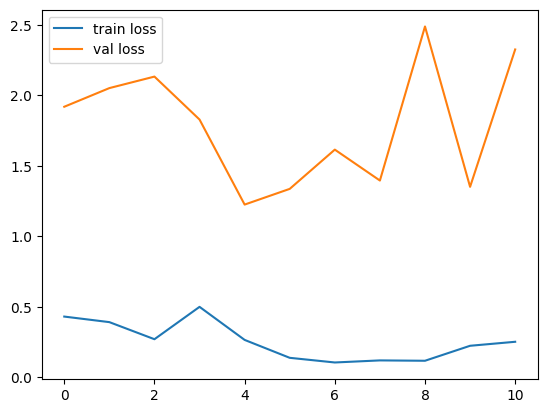

In [ ]:
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.legend()

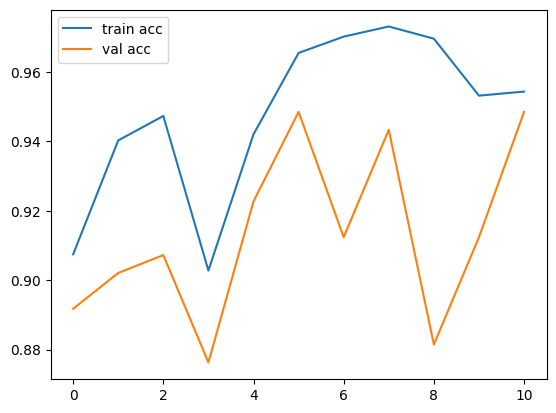

In [ ]:
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.legend()

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/DataXuLyAnh/fruits_classify.h5")

In [ ]:
test_directory = pathlib.Path("/content/drive/MyDrive/DataXuLyAnh/test")
test_set = tf.keras.utils.image_dataset_from_directory(
    test_directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 199 files belonging to 20 classes.


In [ ]:
score = model.evaluate(test_set)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

7/7 [==============================] - 6s 18ms/step - loss: 1.4310 - accuracy: 0.9146
Test loss: 1.4309942722320557
Test accuracy: 0.9145728349685669
